In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [9]:
to_show = True
to_save = False
is_sample = False
# limit_rows = 10000000


In [11]:
# This data cleaning part gets ideas from https://www.kaggle.com/apryor6/detailed-cleaning-visualization-python
# HAN YIKAI takes charge of feature 1-9
# official file
train_file = '../input/train_ver2.csv'
test_file = '../input/test_ver2.csv'

out_path = '../output/EDAed.csv'
# sns.set(rc = {'figure.figsize':(20,18)})


In [12]:
# test_df = pd.read_csv(test_file,
#                       dtype={'sexo': str,
#                              'ind_nuevo': str,
#                              'ult_fec_cli_1t': str,
#                              'indext': str},
#                       # nrows=limit_rows,
#                       low_memory=False
#                       )

In [13]:
base_df = pd.read_csv(train_file,
                      dtype={'sexo': str,
                             'ind_nuevo': str,
                             'ult_fec_cli_1t': str,
                             'indext': str},
                      # nrows=limit_rows,
                      low_memory=False
                      )

# resample the data for saving memory and shuffle the dataset
if is_sample:
    base_df = base_df.sample(frac=0.5)
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              object 
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [14]:
df = base_df

In [15]:
df.describe()

,ncodpers,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.364731e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,...,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.363125e+07,1.363125e+07,1.364731e+07
mean,8.349042e+05,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05,1.022912e-04,2.315475e-05,6.554837e-01,3.939238e-04,...,5.886582e-03,9.170965e-03,2.627404e-03,5.253636e-02,4.438868e-02,2.560761e-02,3.847718e-03,5.472434e-02,5.942854e-02,1.279162e-01
std,4.315650e+05,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05,1.011340e-02,4.811883e-03,4.752103e-01,1.984361e-02,...,7.649791e-02,9.532502e-02,5.119083e-02,2.231060e-01,2.059571e-01,1.579616e-01,6.191053e-02,2.274414e-01,2.364250e-01,3.339965e-01
min,1.588900e+04,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.528130e+05,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.318930e+05,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.199286e+06,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553689e+06,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [16]:
# modify data type to save memory
df.iloc[:, 24:] = df.iloc[:, 24:].astype(bool)

In [17]:
df.iloc[:, :24].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              object 
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [11]:
loss_value = df.iloc[:, :24].isnull().sum()
loss_value
# fecha_dato 日期
# ncodpers 客户代码
# ind_empleado 员工
# pais_residencia 国藉
# sexo 性别,
# age 年龄
# fecha_alta 注册日期,
# ind_nuevo 新的,
# antiguedad 古代,
# indrel 最后访问日期, 一个月indrel
# ult_fec_cli_1t
# indrel_1mes
# tiprel_1mes
# indresi
# indext
# conyuemp
# canal_entrada
# indfall
# tipodom
# cod_prov
# nomprov
# ind_actividad_cliente
# renta
# segmento

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
dtype: int64

In [12]:
df.iloc[:, 0:24].columns.values.tolist()

['fecha_dato',
 'ncodpers',
 'ind_empleado',
 'pais_residencia',
 'sexo',
 'age',
 'fecha_alta',
 'ind_nuevo',
 'antiguedad',
 'indrel',
 'ult_fec_cli_1t',
 'indrel_1mes',
 'tiprel_1mes',
 'indresi',
 'indext',
 'conyuemp',
 'canal_entrada',
 'indfall',
 'tipodom',
 'cod_prov',
 'nomprov',
 'ind_actividad_cliente',
 'renta',
 'segmento']

In [13]:
df = df.drop(df[df['ind_empleado'].isnull()].index)

<AxesSubplot: >

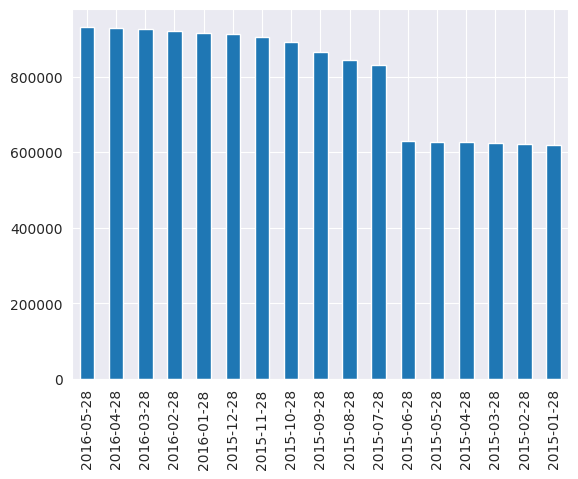

In [14]:
# 0. fecha_dato 日期
df.fecha_dato.value_counts(dropna=False).plot(kind='bar')

In [15]:
# 1. ncodpers 客户代码, 弃用
df.ncodpers.value_counts(dropna=False)


1375586    17
36383      17
36333      17
36388      17
36324      17
           ..
1524805     1
1521777     1
1521049     1
1521045     1
1550586     1
Name: ncodpers, Length: 949614, dtype: int64

In [16]:
# 2. ind_empleado 员工指标,
# Nan = unknown
# one-hot
# A active 活跃, B ex employed 前雇员, F filial 子女, N not employee 非雇员, P pasive 被动, 目前没有寻找新工作, 但是对新工作持开放态度

df.ind_empleado.value_counts(dropna=False)

N    13610977
B        3566
F        2523
A        2492
S          17
Name: ind_empleado, dtype: int64

In [42]:
# 3. pais_residencia 客户国籍 ES占比巨大
# Nan 作为unknown
# TODO 计算占比
# df.pais_residencia.value_counts(dropna=False)
# df.pais_residencia.unique()

new  = df.pais_residencia.value_counts(dropna=False)
# df[df['pais_residencia']=='ES'].sum()
# new.shape
new

ES    13553710
FR        5161
AR        4835
DE        4625
GB        4605
        ...   
ZW          11
DJ          11
JM          11
BM           6
MT           2
Name: pais_residencia, Length: 118, dtype: int64

In [63]:
print(100* round(new/df.shape[0],8)>0.02)

ES     True
FR     True
AR     True
DE     True
GB     True
      ...  
ZW    False
DJ    False
JM    False
BM    False
MT    False
Name: pais_residencia, Length: 118, dtype: bool


In [27]:
df.shape[0]

13619575

In [22]:
df.pais_residencia

0           ES
1           ES
2           ES
3           ES
4           ES
            ..
13647304    ES
13647305    ES
13647306    ES
13647307    ES
13647308    ES
Name: pais_residencia, Length: 13619575, dtype: object

In [ ]:
new =  df['pais_residencia'].sum()
new

In [ ]:
df['pais_residencia']

In [ ]:
# 4. sexo
# Nan = unknown
# 编码 one-hot
df.sexo.value_counts(dropna=False)
df.sexo.unique()

In [ ]:
# 5. age 年龄
# 不需要处理
df.age.value_counts(dropna=False)

df['age'].unique()

In [ ]:
# 6.fecha_alta 客户首次签订合同的日期, 可以用距今差值表示, 月份
df.fecha_alta.value_counts(dropna=False)
df.fecha_alta.isnull().sum()

In [ ]:
months_active = df.loc[df["ind_nuevo"].isnull(),:].groupby("ncodpers", sort=False).size()
months_active.max()

In [ ]:
# 7.ind_nuevo 新客户指数, 如果是6个月内注册的客户, 则为1
# Nan = -1
df.ind_nuevo.value_counts(dropna=False)
df.ind_nuevo.isnull().sum()


In [ ]:
# 8. antiguedad 客户资历, 单位是月
df.antiguedad.value_counts(dropna=False)
df.ind_nuevo.isnull().sum()
# 6,7,8 缺失值数量相等

In [ ]:
# 9. indrel 1表示primary, 99表示当月primary,但不是月末?
# Nan =unknown
# one-hot label编码?
df.indrel.value_counts(dropna=False)

In [ ]:
# 10. ult_fec_cli_1t 作为主要客户的日期
# 缺失值太多, 丢弃
df.ult_fec_cli_1t.value_counts(dropna=False)
df.ult_fec_cli_1t.isnull().sum()

In [ ]:
# 11.indrel_1mes 1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)
# 要把1.0转成1, 2.0-2
# Nan = 0
df.indrel_1mes.value_counts(dropna=False)

In [ ]:
# 12.tiprel_1mes 月初客户关系类型 A (active), I (inactive), P (former customer 前客户),R (Potential 潜在客户)
# Nan = unknown
# label 编码
df.tiprel_1mes.value_counts(dropna=False)

In [ ]:
# 13. indresi 居住指数S (Yes) 银行和居住国相同 N (No) 不同国家
# label编码, S=1, N=0
df.indresi.value_counts(dropna=False)

In [ ]:
# 14. indext 外国人指数, S 本国出生, N 非本国
# label 编码
df.indext.value_counts(dropna=False)

In [ ]:
# 15. conyuemp 配偶指数, S 客户是员工配偶
# 缺失太多, 废弃
df.conyuemp.value_counts(dropna=False)

In [66]:
# 16. canal_entrada	客户渠道 (拉新渠道)
# Nan = unknown, 占比小于3%都是other
# 用占比, 占比低的作为others
df.canal_entrada.value_counts(dropna=False)
df.canal_entrada.isnull().sum()
print(100* round(df.canal_entrada.value_counts(dropna=False)/df.shape[0],8))

KHE    4055270
KAT    3268209
KFC    3098360
KHQ     591039
KFA     409669
        ...   
KDI         17
KDL         11
025         11
KHS          5
KHR          1
Name: canal_entrada, Length: 163, dtype: int64

158392

KHE    29.775305
KAT    23.996410
KFC    22.749315
KHQ     4.339629
KFA     3.007943
         ...    
KDI     0.000125
KDL     0.000081
025     0.000081
KHS     0.000037
KHR     0.000007
Name: canal_entrada, Length: 163, dtype: float64


In [ ]:
# 17. indfall 已故索引 N/S
df.indfall.value_counts(dropna=False)

In [ ]:
# 18. tipodom 地址类型. 1, primary address 弃用
# Nan dropna
# label编码
df.tipodom.value_counts(dropna=False)

In [ ]:
# 19.cod_prov 省份编码
# 转成int
# Nan = 0?
# number
df.cod_prov.value_counts(dropna=False)

In [ ]:
# 20. nomprov 省份名称 弃用
df.nomprov.value_counts(dropna=False)

In [ ]:
# 21. ind_actividad_cliente	活跃指数 1, active customer; 0, inactive customer)
df.ind_actividad_cliente.value_counts(dropna=False)

In [67]:
# 22.renta 家庭总收入 number型
# Nan 太多, 写成-1, 做归一化
df.renta.value_counts(dropna=False)

NaN          2766641
451931.22       5582
463625.16       1743
181042.20       1493
128318.52       1404
              ...   
100303.05          1
119497.38          1
74566.20           1
78719.40           1
133142.67          1
Name: renta, Length: 520995, dtype: int64

In [ ]:
# 23. segmento : 01 - VIP, 02 - 个人 03 - 大学毕业
# Nan = unknown
# label编码
df.segmento.value_counts(dropna=False)

In [ ]:
df.boxplot(column='fecha_dato',by = 'Pclass')
plt.hist(df['fecha_dato'])
plt.xlabel('date')
plt.ylabel('count')

In [ ]:
df[np.isnan(df['open'])].index


In [ ]:
df = df.loc[:, 'ind_empleado'].dropna()


In [ ]:
df.shape

In [ ]:
df.iloc[:, :24].isnull().sum()


In [ ]:
df.iloc[:, 0:12]

In [ ]:
df.iloc[:, 12:24]
# tiprel_1mes 一月  indext=指数 canal_entrada= 输入通道  tipodom=域名类型

In [ ]:
df.iloc[:, 24:]

In [ ]:
df.info()

In [ ]:
def show_save(is_show=False, is_save=False, name=None):
    if is_show:
        plt.show()
    if is_save:
        plt.savefig(name)

In [ ]:
# for 'age' :
df['age'] = pd.to_numeric(df['age'], errors='coerce')

plt.figure(dpi=300, figsize=(24, 8))
sns.displot(df['age'],
            bins=np.arange(0, 121, 2),
            kde=False)
plt.ylabel('Customers', fontsize=12)
plt.xlabel('Age', fontsize=12)

show_save(is_show=False, is_save=True, name='test')


In [ ]:
# find mean of age in different stage
low_mean_age = df.loc[(df.age >= 18) & (df.age <= 30), 'age'].mean(skipna=True)
high_mean_age = df.loc[(df.age >= 30) & (df.age <= 100), 'age'].mean(skipna=True)
total_mean_age = df['age'].mean()
# fill age values
df.loc[df.age > 100, 'age'] = high_mean_age
df.loc[df.age < 18, 'age'] = low_mean_age
df['age'].fillna(total_mean_age, inplace=True)
plt.figure(dpi=300, figsize=(24, 8))
sns.displot(df['age'],
            bins=np.arange(0, 101, 2),
            kde=False)
plt.ylabel('Customers', fontsize=12)
plt.xlabel('Age', fontsize=12)
show_save(to_show, to_save)

In [ ]:

# for nomprov
# fix special value
df.loc[df.nomprov == "CORU\xc3\x91A, A", "nomprov"] = "CORUNA, A"

# for 'ind_nuevo' : because the max of months_active is 6, so we fill ind_nuevo by 1
months_active = df.loc[df['ind_nuevo'].isnull(), :].groupby('ncodpers', sort=False).size()
# the result is 6 which means all missing values of customers are new.
months_active.max()
# 1 means new customer
df.loc[df['ind_nuevo'].isnull(), 'ind_nuevo'] = 1

# for 'fecha_alta' : sort dates and use index to find median_date
dates = df.loc[:, 'fecha_alta'].sort_values().reset_index()
median_date = int(np.median(dates.index.values))
dates = df.loc[:, 'fecha_alta'].sort_values().reset_index()
df.loc[df.fecha_alta.isnull(), 'fecha_alta'] = dates.loc[median_date, 'fecha_alta']
df['fecha_alta'].describe()


In [ ]:

# for 'pais_residencia', 'sexo', 'ind_empleado' and 'indresi' :
df.loc[df['pais_residencia'].isnull(), 'pais_residencia'] = 'NA'
df.loc[df['sexo'].isnull(), 'sexo'] = 'NA'
df.loc[df['ind_empleado'].isnull(), 'ind_empleado'] = 'NA'
df.loc[df['indresi'].isnull(), 'indresi'] = 'NA'



In [ ]:
# for antiguedad
df['antiguedad'] = pd.to_numeric(df['antiguedad'], errors='coerce')
df.loc[df['antiguedad'].isnull(), 'antiguedad'] = df['antiguedad'].min()
# treat for -999999 outliers
df.loc[df['antiguedad'] < 0, 'antiguedad'] = 0

In [ ]:


# LIU JIAYU takes charge of feature 15-19
# for 'indext' : most of the customers have their birth country different than the bank country
# for 'conyuemp' : huge missing values, drop it.
# for 'tipodom' : not seem to be useful, the value of it almost be '1', drop it.
df.drop(['conyuemp', 'tipodom'], axis=1, inplace=True)
# for 'indfall' : deceased index, set missing value to be 'N' means not deceased.
df.loc[df.indfall.isnull(), 'indfall'] = 'N'
# drop all missing values of else features 'indext' and 'canal_entrada'.
# draw two figures for 'canal_entrada'
plt.figure(figsize=(20, 14))
df['canal_entrada'].value_counts(dropna=False)(dropna=False)().plot(x=None, y=None, kind='pie')
plt.show()

# extract the necessary columns
canal_label = df.loc[:, ['canal_entrada']].join(df.iloc[:, 24:])
# in five major channels
canal_subset = ['KHE', 'KAT', 'KFC', 'KFA', 'KHK']
canal_label = canal_label.loc[canal_label['canal_entrada'].isin(canal_subset)]
canal_label = canal_label.groupby('canal_entrada').agg('sum')
canal_label.T.plot(kind='barh', stacked=True, fontsize=14, figsize=[16, 12])
plt.title('Major join channels associated with products')
plt.xlabel('Total number of customers')
plt.ylabel('Products')
plt.legend()
plt.show()


In [ ]:

# WU SHANSHAN takes charge of feature 10-14
# for 'indrel' : fill in the missing value with common status 1
unique_ids = pd.Series(df['ncodpers'].unique())
pd.Series([i for i in df.indrel]).value_counts()
df.loc[df.indrel.isnull(), 'indrel'] = 1
# for 'tiprel_1mes' : fill in the missing value with common status 'A'
df.loc[df.tiprel_1mes.isnull(), 'tiprel_1mes'] = 'A'
df.tiprel_1mes = df.tiprel_1mes.astype("category")
# for 'indrel_1mes' : fill in the missing value with common status 'P'
map_dict = {1.0: "1",
            "1.0": "1",
            "1": "1",
            "3.0": "3",
            "P": "P",
            3.0: "3",
            2.0: "2",
            "3": "3",
            "2.0": "2",
            "4.0": "4",
            "4": "4",
            "2": "2"}
df.indrel_1mes.fillna('P', inplace=True)
df.indrel_1mes = df.indrel_1mes.apply(lambda x: map_dict.get(x, x))
df.indrel_1mes = df.indrel_1mes.astype('category')

# LU YUCHENG takes charge of feature 20-24
# for 'cod_prov' : assign a new category(the value is 0)
df.loc[df['cod_prov'].isnull(), 'cod_prov'] = 0
# for 'renta' : replace missing values with the median of gross income by province
#               if all values in one province are missing values, replace them with the median of all incomes
total_median = df.loc[df['renta'].notnull(), 'renta'].median()
df.loc[df['renta'].isnull(), 'renta'] = 0
renta_by_province = df.groupby('cod_prov').agg({'renta': lambda x: x.median(skipna=True)}).reset_index()
renta_by_province = renta_by_province.replace(0, total_median)
for i in range(len(renta_by_province)):
    province_data = df[(df['cod_prov'] == i) & (df['renta'] == 0)]
    df.loc[(df['cod_prov'] == i) & (df['renta'] == 0), 'renta'] = renta_by_province.loc[i, 'renta']
# for 'segmento' : map string value with int value and assign a new category(the value is 0)
mapping = {'01 - TOP': 1, '02 - PARTICULARES': 2, '03 - UNIVERSITARIO': 3}
df['segmento'] = df['segmento'].map(mapping)
df.loc[df['segmento'].isnull(), 'segmento'] = 0
# df.drop(['nomprov'], axis=1, inplace=True)

# Drop the columns with majority of missing values
df.drop(["ult_fec_cli_1t"], axis=1, inplace=True)
df.dropna(inplace=True)
print(df.isnull().any())
print(df.info())

# resample for memory
if is_sample is True:
    # df = df.sample(n=50000)
    df = df.sample(frac=0.5)
if to_save:
    df.to_csv(out_path)